In [154]:
import json
resultdir = '/home/david/projects/postdoc/stacksyms/data/stackbert-dataset/results'
GCC_x64_combined  = json.load(open(resultdir + '/' + 'GCC_x64_combined.json','r'))
LLVM_x64_combined = json.load(open(resultdir + '/' + 'LLVM_x64_combined.json','r'))
OPTLVL = 'O3'

In [155]:
GCC_x64_combined_results = {
    binary : [
        result for label, pred, result in GCC_x64_combined[binary][OPTLVL].values()
    ] for binary in GCC_x64_combined.keys()
}
LLVM_x64_combined_results = {
    binary : [
        result for label, pred, result in LLVM_x64_combined[binary][OPTLVL].values()
    ] for binary in LLVM_x64_combined.keys()
}

LLVM 13.0.0 mean: 88.4870815989185
GCC 11.1.0 mean: 68.52472594060484


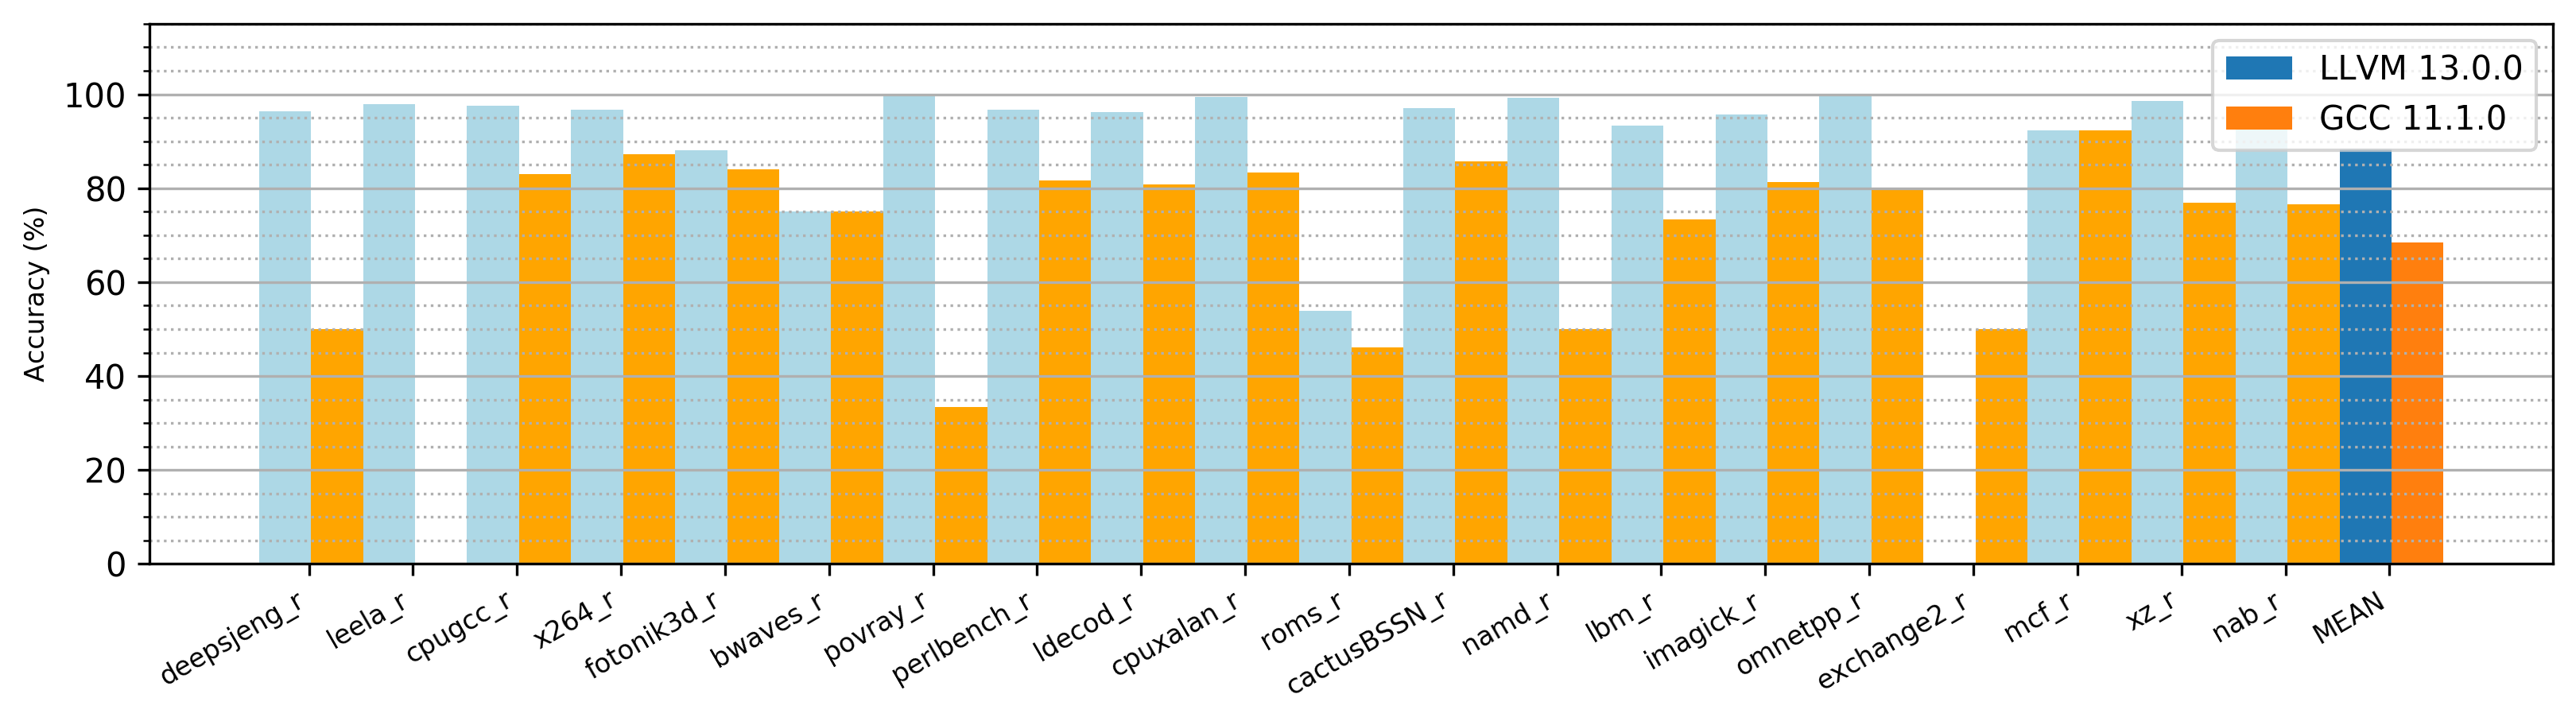

In [156]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import brewer2mpl

from collections import OrderedDict

WIDTH  = 2.5
colorscheme = brewer2mpl.get_map('Paired', 'Qualitative', 12).mpl_colors

def plot(ax, x_positions, data_dict, color, text_align, label, show_totals=False):
    accuracies = []
    for i, (benchmark, results) in enumerate(data_dict.items()):
        wrong = len([result for result in results if result=='wrong'])
        correct  = len(results)-wrong
        accuracies += [correct / len(results) * 100]
        ax.bar(x_positions[i] , accuracies[-1], WIDTH, align='center', color=color)
    avg = sum(accuracies)/len(accuracies) # fraction of percentage.. YIKES! :P
    print(label, "mean:", avg)
    ax.bar(x_positions[-1] , avg, WIDTH, align='center', label=label)
    accuracies += [avg]
    if show_totals:
        for rect, acc in zip(ax.patches, accuracies):
            ax.text(rect.get_x() + rect.get_width()/2, acc+5, f'{acc:.2f}', ha=text_align, va='bottom', color='gray')
            #plt.bar(x_positions+WIDTH*i, accuracies[-1], WIDTH, align='center')#, color=colorscheme[i])
    return x_positions

def graph(llvm_data_dict, gcc_data_dict):
    fig, ax = plt.subplots(figsize=(13,3), dpi=300)
    x_positions = x_positions = np.array(range(len(llvm_data_dict.keys()) + 1))*5
    plot(ax, x_positions, llvm_data_dict, 'lightblue', 'center', 'LLVM 13.0.0')
    x_positions = np.array(range(len(gcc_data_dict.keys()) + 1))*5 + 2.5
    plot(ax, x_positions, gcc_data_dict, 'orange', 'left', 'GCC 11.1.0')
    labels = [l for l in llvm_data_dict.keys()] + ['MEAN']
    tick_positions = x_positions - 1.35
    plt.xticks(tick_positions, labels, rotation=30, horizontalalignment='right', fontsize=8)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
    plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(5))
    plt.grid(b=True, axis='y', which='major', linestyle='-')
    plt.grid(b=True, axis='y', which='minor', linestyle=':')
    plt.ylabel('Accuracy (%)', fontsize=8)
    plt.ylim(ymin=0, ymax=115)
    ax.legend()
    #print(help(ax.legend))
    #plt.legend(labels, loc='best', fontsize=8)
    plt.savefig(f'SPEC2017_AMD64_{OPTLVL}.pdf', bbox_extra_artists=[], bbox_inches='tight')
    plt.show()

graph(LLVM_x64_combined_results, GCC_x64_combined_results)

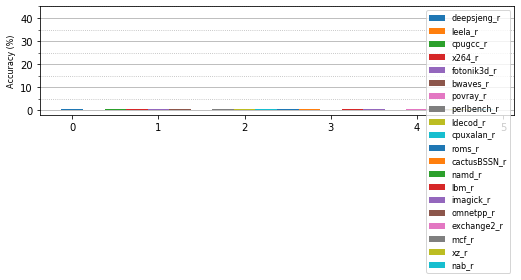

In [ ]:
translate_SPEC06 = {
    '400_perlbench': 'perlbench',
    '401_bzip2': 'bzip2',
    '403_gcc': 'gcc',
    '429_mcf': 'mcf',
    '445_gobmk': 'gobmk',
    '456_hmmer': 'hmmer',
    '458_sjeng': 'sjeng',
    '462_libquantum': 'libquantum',
    '464_h264ref': 'h264ref',
    '471_omnetpp': 'omnetpp',
    '473_astar': 'astar',
    '483_xalancbmk': 'xalancbmk',
    '433_milc': 'milc',
    '444_namd': 'namd',
    '447_dealII': 'dealII',
    '450_soplex': 'soplex',
    '453_povray': 'povray',
    '470_lbm': 'lbm',
    '482_sphinx3': 'sphinx3',
    'Mean': 'Mean',
    'Geo Mean': 'Geo Mean'
}